## EDA with Python 
# We will try to predict a classification -servival or deceasesd. Here we will apply logistic Regression in python for classification .
## We will use semi clean version of the titanic data set . 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Let us start read data set pandas DF
train=pd.read_csv('dataset/titanic_train.csv')

In [125]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Some core fields definations:
## Pclass= it denotes passenger class
## SibSp(sibling-spouse)= Total count of spouse and siblings
## Parch= Total count of parents and chidren
# Based on the passenger information we have we need to predict whether the passenger has servived of not? Servived column


# First of all we need to check the NULL value presentation NaN. MISSING Data foundation level:

In [7]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# We found AGe and Cabin there is 177 and 687 data is NaN

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## to more clear picture and more visualization concept we will use seaborn how many null and not null values

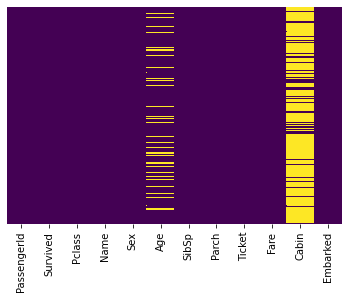

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#Here we can see that it is very clear to understand that Age and Cabin NULL values represent Yellow color 
#with the same number of records.Above mention heatmap X is represent all my COLUMN name where Y is false so nothing 
#to be there(records information which no need now)


##Here now we will see how we can handle NULL values we have come up the in AGE(around 20% of data) and CABIN(maximum) 177 #and 687 NULL are present. from these observation we can conclude that Age can be replace imputation where as Cabin as long #as much more data missing we might drop it or change to feature know 1 or 0

Let us Visualize some more of data :

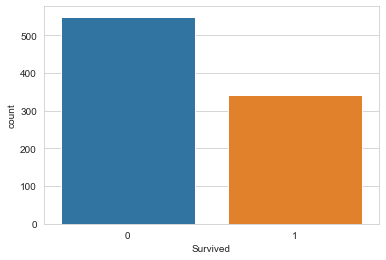

In [30]:
sns.set_style("whitegrid")
sns.countplot('Survived',data=train)

In [32]:
#The figure above is represent that more than 549 passenger not survived and 342 passenger has been servived.

In [47]:
train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [50]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64



# Now we will categoriese how many Male and female survivded . Here we found 468 M and 81 F not survived where as 233 F and 109 M has been survived.

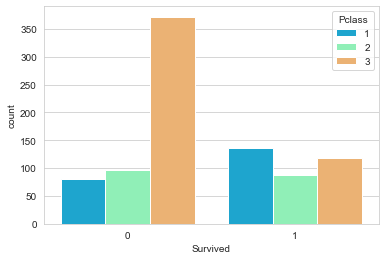

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [83]:
train[['Survived','Pclass']].value_counts()

Survived  Pclass
0         3         372
1         1         136
          3         119
0         2          97
1         2          87
0         1          80
dtype: int64

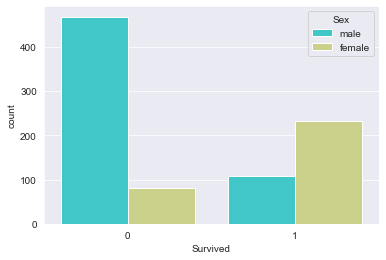

In [85]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

In [84]:
train[['Survived','Sex']].value_counts()

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
dtype: int64

Now we will see about distribution plot which can show us the data between the range of distribution. here we will use Distplot by AGE and we will going t remove NULL value of Age and here we don't need to see Kernal Density Estimation.It is besically use for PDF ( probability density function)

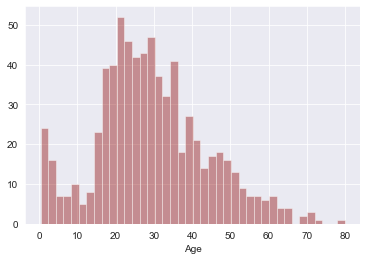

In [104]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

# So this distplot basically a histogram which is giving us the counts of the people of the specific range of age. Here also we can see the normal distribution.Bell curve. i can reduce some bins

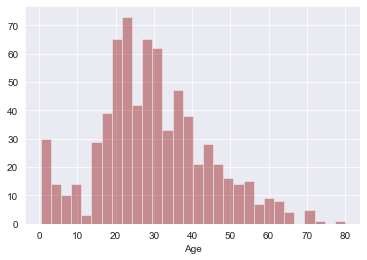

In [105]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

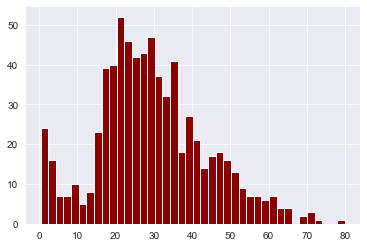

In [109]:
train['Age'].hist(bins=40,color='darkred')

In [ ]:
Both are same one use seaborn Distplot and another use Matplotlib (HIST)

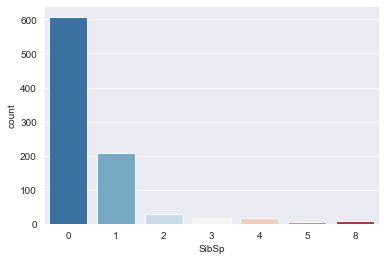

In [111]:
sns.countplot(train['SibSp'],data=train,palette='RdBu_r')

We are trying to found out is that countplot of Sibling Spouse,So 0 mean 600 people doesn't have either spouse / sibling, 
1 mean 200 people have either spouse, 2 mean have  20/30 having sibling with spouse 3 may be two sibling one spouse

In [ ]:
Now we will see fair histogram by matplotlib

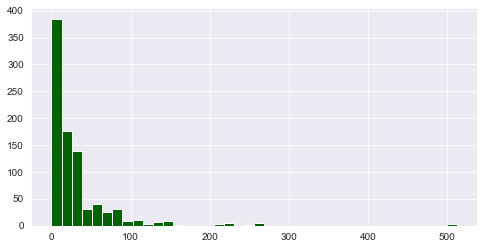

In [124]:
train['Fare'].hist(color='darkgreen',bins=40,figsize=(8,4))

#it shows us the average ticket price passenger bought

## Data Cleaning Part

In [128]:
#In this senario we will fill out missing age data instead of dropping null values of age records.one way to do that is mean 
#value of AGE which called imputation. We can see the first average age by  the passenger class

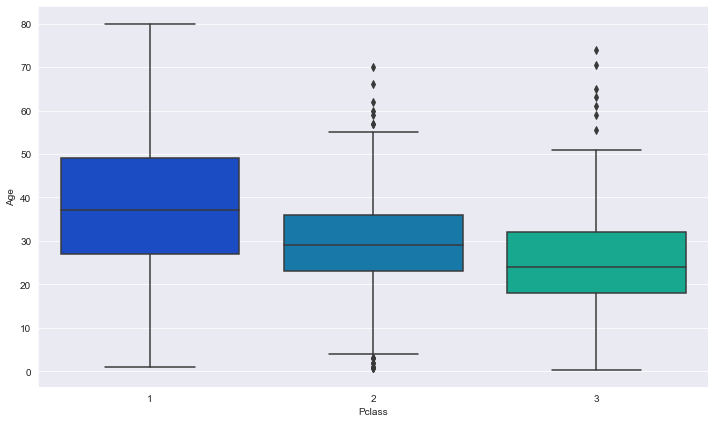

In [130]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In our observation we have seen that there is some relation between Class of passenger with their age . so we need to figure
which passenger class having the average age.here Box plot easily we can see that 1 class passenger age range 28 to 49 where 
25 percentile value is around 27 ,average 50th percentile value around 38 and 75th percentle value 49.So my average age for 
first box passenger class 1 37-38 age.and for pessager class 2 average age around 29 and passenger class 3 average age 24.
now replacing NaN value in the AGE column.

We have notice that passenger in higher class tend to be older which makes us sense.

Now we will use this average values to IMPUTE based on Plcass for AGE.

In [165]:
age_m=train.groupby('Pclass')['Age'].mean().apply(np.floor)

# Getting mean of Age average according to Passenger class and make floor value

In [166]:
age_m.head()

Pclass
1    38.0
2    29.0
3    25.0
Name: Age, dtype: float64

# for this we need to make one data set so we make csv and load it again as AGE_MEAN

In [167]:
age_m.to_csv('dataset/age_m.csv')

In [168]:
age_m=pd.read_csv('dataset/age_m.csv')

In [169]:
age_m.head()

,Pclass,Age
0,1,38.0
1,2,29.0
2,3,25.0


In [ ]:
# for NULL value computational purpose we will create one column on train dataset and put the values of mean each rows 
# as per passenger class it will store we use here Map function for pclass, age mapping with both Data set so it 
# will map match and put the values accordingly

In [186]:
train['age_mean']=train['Pclass'].map(age_m.set_index('Pclass')['Age'])

In [187]:
train.tail(n=30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_mean
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S,29.0
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,38.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25.0,8,2,CA. 2343,69.5500,NaN,S,25.0
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S,29.0
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S,29.0
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,29.0
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,38.0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,25.0,0,0,345777,9.5000,NaN,S,25.0
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,25.0
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S,25.0


In [176]:
train['Age'] = np.where(train['Age'].isnull(), train['age_mean'], train['Age'])

In [ ]:
# Above statement show only NaN value of Age will be replace with mean value fo age_mean column it will search NULL chekc and 
# get value from age_mean and put into Age field where it is NULL

In [177]:
train.tail(n=100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_mean
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,29.0
792,793,0,3,"Sage, Miss. Stella Anna",female,25.0,8,2,CA. 2343,69.5500,NaN,S,25.0
793,794,0,1,"Hoyt, Mr. William Fisher",male,38.0,0,0,PC 17600,30.6958,NaN,C,38.0
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S,25.0
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,29.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,38.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S,25.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,38.0


In [188]:
# drop the column which we make as dummy purpose
train.drop(['age_mean'], axis = 1,inplace=True) 

In [182]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


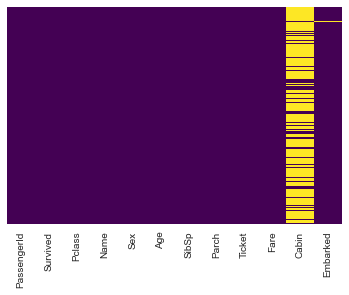

In [185]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# As long as Cabin got many many number of NULl values so it is considerable to drop this column

In [189]:
train.drop('Cabin',axis=1, inplace=True)

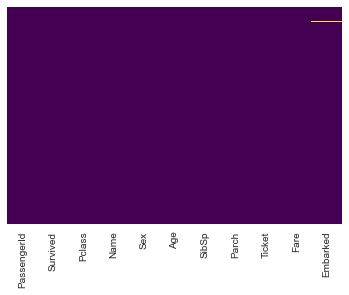

In [191]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [194]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [195]:
train.dropna(inplace=True)  # We are removing NaN rows for Embaraked

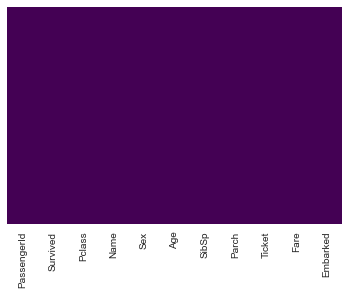

In [196]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [197]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


# Converting Categorical features
## We will convert categorical features into dummy variables otherwise ML algorithm will not be able to take those features

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [210]:
# here we will apply SEX and EMBARKED into categorical feature and set into dummies variables to process ML Algorithm

pd.get_dummies(train['Embarked'],drop_first=True).head()

KeyError: 'Embarked'

In [207]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embardk=pd.get_dummies(train['Embarked'],drop_first=True)

KeyError: 'Sex'

In [212]:
# Now i am going to drop feature which i don't required

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex' 'Embarkd' 'Name' 'Ticket'] not found in axis"

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [235]:
#Now i will append / contact SEX and Embark which i make as categorical feature

train=pd.concat([train,sex,embardk],axis=1)

In [237]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [242]:
# great our data set is ready for model

In [244]:
# Now here i will categorise data into dependent and independent feature. here only Survived is my dependent feature 
# and rest of the features are independent

## Building Logistic Regression Model
## lets start splitting our data into training and test set 

# Train Test split

In [250]:
train.drop('Survived',axis=1).head() # All Independent features which is calle training Data set

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [252]:
train['Survived'].head()  # Dependent Features which is called OUTPUT data set

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [272]:
#X=np.array(train.drop('Survived',axis=1))
#y=np.array(train['Survived'])

In [327]:
from sklearn.model_selection import train_test_split


In [341]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),   # X values 
                                                train['Survived'],test_size=0.30, # Y values and 30% will be my test
                                               )

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

#logreg = LogisticRegression(max_iter=1000)

# Training and Prediction

In [342]:
from sklearn.linear_model import LogisticRegression

In [343]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [344]:
predictions=logmodel.predict(X_test)

In [345]:
from sklearn.metrics import confusion_matrix

In [346]:
accuracy=confusion_matrix(y_test,predictions)

In [347]:
logmodel.score(X_test,y_test)

0.8052434456928839

In [349]:
accuracy

array([[143,  26],
       [ 26,  72]], dtype=int64)

In [350]:
from sklearn.metrics import accuracy_score

In [351]:
accuracy=accuracy_score(y_test,predictions)
accuracy


0.8052434456928839

In [352]:
accuracy_on_train=logmodel.score(X_train,y_train)
accuracy_on_test=logmodel.score(X_test,y_test)
accuracy_on_train , accuracy_on_test

(0.7765273311897106, 0.8052434456928839)

In [353]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [354]:
y_test

792    0
843    0
290    1
196    0
137    0
      ..
470    0
171    0
701    1
436    0
451    0
Name: Survived, Length: 267, dtype: int64

In [322]:
len(X_train) , len(X_test),len(y_train), len(y_test)

(622, 267, 622, 267)